In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import data packages


import statsmodels.api as sm
#import regression packages
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [164]:
d = pd.read_csv('clean_pset1.csv')

In [165]:
#re-define variables from last question

#variable classification

#outcome
y = ['dbrwt']
#treatment
D = ['tobacco']
#cor with y and D
x1 = ['alcohol', 'mrace3_2', 'mrace3_3', 'ormothhis', 'adeq_2.0', 'adeq_3.0', 'cardiac', 'pre4000', 'phyper', 'chyper', 
     'diabetes', 'anemia', 'lung', 'dlivord', 'educ_0.0', 'educ_1.0', 'educ_2.0', 'dgestat', 'dmage', 'dmar']
#cor with D not y
x2 = []
#cor with y not D
x3 = ['csex', 'tot_2.0','tot_3.0','tot_4.0','tot_5.0','tot_6.0','tot_7.0','tot_8.0', 'live_1.0', 'live_2.0', 
      'live_3.0','live_4.0','live_5.0','live_6.0','live_7.0','live_8.0','live_9.0', 
    'cnto_1.0', 'cnto_2.0', 'cnto_3.0', 'plur_1']

In [166]:
print(d['tobacco'].value_counts())

0.0    96344
1.0    18266
Name: tobacco, dtype: int64


In [168]:
#running logit
vals = sm.Logit(d[D],sm.add_constant(d[x1+x3]))
out = vals.fit()
print(out.summary())

         Current function value: 0.376282
         Iterations: 35


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:                tobacco   No. Observations:               114610
Model:                          Logit   Df Residuals:                   114568
Method:                           MLE   Df Model:                           41
Date:                Sat, 30 Sep 2023   Pseudo R-squ.:                  0.1421
Time:                        16:34:13   Log-Likelihood:                -43126.
converged:                      False   LL-Null:                       -50272.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5861      0.154      3.812      0.000       0.285       0.887
alcohol        1.9085      0.069     27.708      0.000       1.773       2.043
mrace3_2      -1.5234      0.126    -12.124      0.0

In [169]:
post = out.predict(sm.add_constant(d[x1+x3]))
d['post'] = post
print(d['post'].describe())

count    1.146100e+05
mean     1.593753e-01
std      1.361483e-01
min      4.565778e-11
25%      5.818138e-02
50%      1.159602e-01
75%      2.151770e-01
max      9.557719e-01
Name: post, dtype: float64


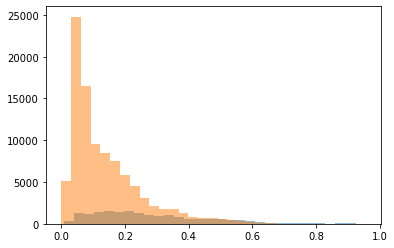

In [170]:
plt.hist(d[d['tobacco']==1]['post'], bins =30, alpha = 0.5)
plt.hist(d[d['tobacco']==0]['post'], bins = 30, alpha = 0.5)
plt.show()

In [171]:
#creating equal-sized bins
labels = [1] + [(i/10)+1 for i in range(10, 100, 10)]
d['bin'] = pd.qcut(d['post'], 10, labels=labels)

#print(d['bin'].describe())
#print(d['bin'].value_counts())

df = pd.get_dummies(d['bin'], prefix = 'bin')
#print(df.columns)

In [172]:
#creating bins of unequal size, but equal distances in propensity score
bin_sizes = [(0,.1)]
for i in range(1, 10, 1):
    print(i)
    bin_sizes.append((i/10, (i+1)/10))
#print(bin_sizes)
bins2 = pd.IntervalIndex.from_tuples(bin_sizes)
d['cat'] = pd.cut(d['post'], bins2)
#print(d['cat'])
#print(d['cat'].value_counts())
df2 = pd.get_dummies(d['cat'], prefix = 'cat')
#print(df2.columns)

1
2
3
4
5
6
7
8
9


In [157]:
#testing balance in phat
for item in x1+x3:

    vals = sm.OLS(d[item], sm.add_constant(pd.concat([d['tobacco'],df2[['cat_(0.1, 0.2]', 'cat_(0.2, 0.3]', 'cat_(0.3, 0.4]',
       'cat_(0.4, 0.5]', 'cat_(0.5, 0.6]', 'cat_(0.6, 0.7]', 'cat_(0.7, 0.8]',
       'cat_(0.8, 0.9]', 'cat_(0.9, 1.0]']]], axis = 1)))
    out = vals.fit()
    print(item)
    print('coefficients')
    print(out.params[1:2])
    print('standard errors')
    print(out.bse[1:2])
    print('test stat')
    print(out.params[1:2]/out.bse[1:2])



alcohol
coefficients
tobacco   -0.000416
dtype: float64
standard errors
tobacco    0.000679
dtype: float64
test stat
tobacco   -0.612789
dtype: float64
mrace3_2
coefficients
tobacco   -0.006888
dtype: float64
standard errors
tobacco    0.001177
dtype: float64
test stat
tobacco   -5.854382
dtype: float64
mrace3_3
coefficients
tobacco   -0.004175
dtype: float64
standard errors
tobacco    0.002736
dtype: float64
test stat
tobacco   -1.525798
dtype: float64
ormothhis
coefficients
tobacco   -0.003813
dtype: float64
standard errors
tobacco    0.001582
dtype: float64
test stat
tobacco   -2.409859
dtype: float64
adeq_2.0
coefficients
tobacco    0.002775
dtype: float64
standard errors
tobacco    0.003424
dtype: float64
test stat
tobacco    0.810411
dtype: float64
adeq_3.0
coefficients
tobacco    0.000424
dtype: float64
standard errors
tobacco    0.001728
dtype: float64
test stat
tobacco    0.24516
dtype: float64
cardiac
coefficients
tobacco   -0.000147
dtype: float64
standard errors
tobacco    

In [159]:
#ATE
bins = ['cat_(0.0, 0.1]', 'cat_(0.1, 0.2]', 'cat_(0.2, 0.3]', 'cat_(0.3, 0.4]',
       'cat_(0.4, 0.5]', 'cat_(0.5, 0.6]', 'cat_(0.6, 0.7]', 'cat_(0.7, 0.8]',
       'cat_(0.8, 0.9]', 'cat_(0.9, 1.0]']
meandifs = []
totaldif = 0.0


for item in bins:
    d[item] = df2[item]
    d[item+'tobacco']= df2[item]*d['tobacco']
    #print(d[d[item+'tobacco']==1]['dbrwt'].mean())
    #print(d[d[item+'tobacco']+d[item]==1]['dbrwt'].mean())
    print('block')
    print(item[5:-1])
    print('mean difference in birthweight between smokers and nonsmokers within block')
    print(d[d[item+'tobacco']==1]['dbrwt'].mean() - d[d[item+'tobacco']+d[item]==1]['dbrwt'].mean())
    print('number of observations in block')
    print(d[item].sum())
    meandifs.append(d[d[item+'tobacco']==1]['dbrwt'].mean() - d[d[item+'tobacco']+d[item]==1]['dbrwt'].mean())
    totaldif = totaldif + (d[d[item+'tobacco']==1]['dbrwt'].mean() - d[d[item+'tobacco']+d[item]==1]['dbrwt'].mean())*d[item].sum()
    
print(meandifs)
print('ATE')
print(totaldif/d.shape[:1])


block
0.0, 0.1
mean difference in birthweight between smokers and nonsmokers within block
-202.33456926449253
number of observations in block
44669
block
0.1, 0.2
mean difference in birthweight between smokers and nonsmokers within block
-241.79201781090296
number of observations in block
42598
block
0.2, 0.3
mean difference in birthweight between smokers and nonsmokers within block
-204.60642401497535
number of observations in block
12526
block
0.3, 0.4
mean difference in birthweight between smokers and nonsmokers within block
-163.00160083490073
number of observations in block
7433
block
0.4, 0.5
mean difference in birthweight between smokers and nonsmokers within block
-175.53161934130594
number of observations in block
4372
block
0.5, 0.6
mean difference in birthweight between smokers and nonsmokers within block
-220.14101604278085
number of observations in block
2035
block
0.6, 0.7
mean difference in birthweight between smokers and nonsmokers within block
-277.24081356765373
numbe

In [160]:
#ATT
bins = ['cat_(0.0, 0.1]', 'cat_(0.1, 0.2]', 'cat_(0.2, 0.3]', 'cat_(0.3, 0.4]',
       'cat_(0.4, 0.5]', 'cat_(0.5, 0.6]', 'cat_(0.6, 0.7]', 'cat_(0.7, 0.8]',
       'cat_(0.8, 0.9]', 'cat_(0.9, 1.0]']
meandifs = []
totaldif = 0.0


for item in bins:
    d[item] = df2[item]
    d[item+'tobacco']= df2[item]*d['tobacco']
    #print(d[d[item+'tobacco']==1]['dbrwt'].mean())
    #print(d[d[item+'tobacco']+d[item]==1]['dbrwt'].mean())
    print('block')
    print(item[5:-1])
    print('mean difference in birthweight between smokers and nonsmokers within block')
    print(d[d[item+'tobacco']==1]['dbrwt'].mean() - d[d[item+'tobacco']+d[item]==1]['dbrwt'].mean())
    print('number of smokers in block')
    print(d[item+'tobacco'].sum())
    meandifs.append(d[d[item+'tobacco']==1]['dbrwt'].mean() - d[d[item+'tobacco']+d[item]==1]['dbrwt'].mean())
    totaldif = totaldif + (d[d[item+'tobacco']==1]['dbrwt'].mean() - d[d[item+'tobacco']+d[item]==1]['dbrwt'].mean())*d[item+'tobacco'].sum()
    
print(meandifs)
print('ATT')
print(totaldif/d['tobacco'].sum())


block
0.0, 0.1
mean difference in birthweight between smokers and nonsmokers within block
-202.33456926449253
number of smokers in block
3037.0
block
0.1, 0.2
mean difference in birthweight between smokers and nonsmokers within block
-241.79201781090296
number of smokers in block
5739.0
block
0.2, 0.3
mean difference in birthweight between smokers and nonsmokers within block
-204.60642401497535
number of smokers in block
3299.0
block
0.3, 0.4
mean difference in birthweight between smokers and nonsmokers within block
-163.00160083490073
number of smokers in block
2471.0
block
0.4, 0.5
mean difference in birthweight between smokers and nonsmokers within block
-175.53161934130594
number of smokers in block
1913.0
block
0.5, 0.6
mean difference in birthweight between smokers and nonsmokers within block
-220.14101604278085
number of smokers in block
1100.0
block
0.6, 0.7
mean difference in birthweight between smokers and nonsmokers within block
-277.24081356765373
number of smokers in block

In [161]:
#4e

#Di/p(Xi)
d['wt'] = d['tobacco'] / d['post']

#(1-Di)/(1-p(Xi))
d['wt2'] = (1 - d['tobacco']) /(1 -  d['post'])

#YiDi/p(Xi)
d['plugin'] = d['dbrwt']*d['wt']

#Yi(1-Di)/(1-p(Xi))
d['plugin2'] = d['dbrwt']*d['wt2']

#adding, dividing, and subtracting to get "improved performance" ATE
print('reweighted ATE')
ATE = (d['plugin'].sum()/d['wt'].sum()) - (d['plugin2'].sum()/d['wt2'].sum())
print(ATE)

reweighted ATE
-220.6669678705639


In [162]:
d['D'] = d['tobacco']

d['X'] = ((d['tobacco'] - d['post'])*d['dbrwt'])/(1 -  d['post'])

ATT = d['X'].sum()/d['D'].sum()
print('ATT- Wooldridge')
print(ATT)

ATT- Wooldridge
-201.12708526145462
